# Building an ARIMA model for time series forecasting of river flow data


In [1]:
# import data and view as plot
from arima_functions import *
import pandas as pd
import matplotlib.pyplot as plt

# import data - using data from the Brahamaputra River, Bangladesh
file_path = "DATA/2651100_Q_Day.Cmd.txt"
metadata, data = read_data(file_path)
station_info, parsed_data = process_data(metadata, data)

print("Station Information:")
print(station_info)
print("Data:")
print(parsed_data.head())


Station Information:
{'GRDC-No.': '2651100', 'River': 'BRAHMAPUTRA RIVER', 'Station': 'BAHADURABAD', 'Country': 'BD', 'Latitude (DD)': '25.18', 'Longitude (DD)': '89.67', 'Catchment area (km²)': None, 'Altitude (m ASL)': '19.0', 'Time series': '1985-04 - 1992-03', 'No. of years': '8', 'Last update': '2018-05-29'}
Data:
         Date   Value
0  1985-04-03  6370.0
1  1985-04-04  6320.0
2  1985-04-05  6290.0
3  1985-04-06  6350.0
4  1985-04-07  6920.0


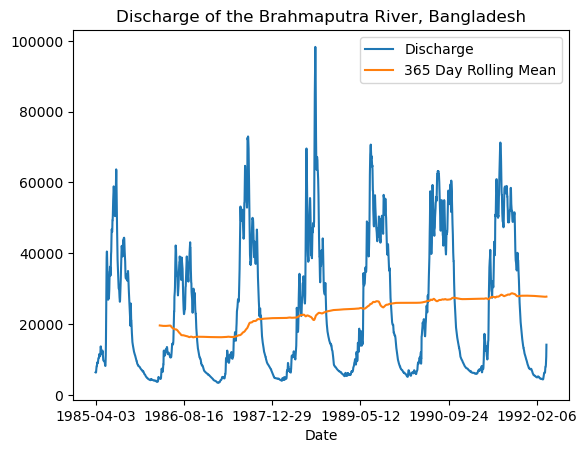

In [2]:
# plot the data
parsed_data.plot(y='Value', x='Date', title='Discharge of the Brahmaputra River, Bangladesh')
# add rolling mean value    
parsed_data['Value'].rolling(window=365).mean().plot()
plt.legend(['Discharge', '365 Day Rolling Mean'])
plt.show()


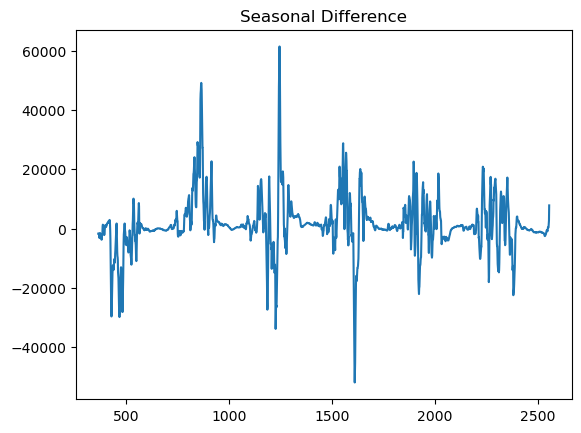

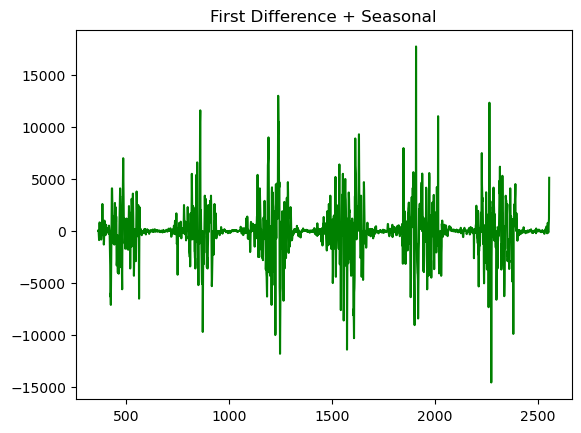

In [6]:
# as data will be seasonal, do seasonal differencing
parsed_data['Seasonal Difference'] = parsed_data['Value'] - parsed_data['Value'].shift(365)
parsed_data['Seasonal Difference'].plot(title='Seasonal Difference')
plt.show()

# take the first difference
parsed_data['First Difference'] = parsed_data['Seasonal Difference'] - parsed_data['Seasonal Difference'].shift(1)
parsed_data['First Difference'].plot(title='First Difference + Seasonal', color='green')
plt.show()


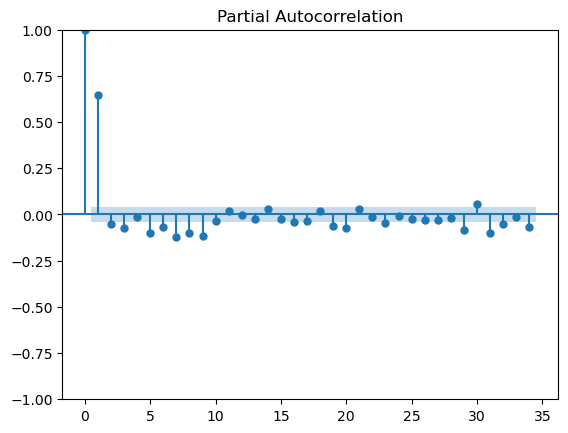

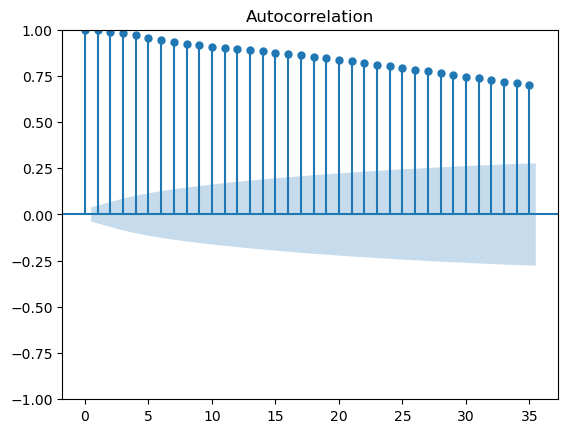

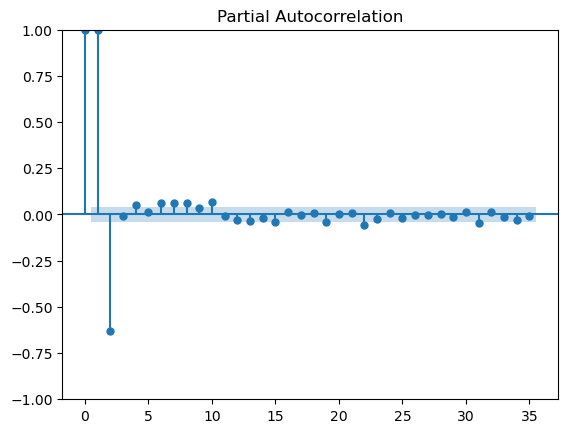

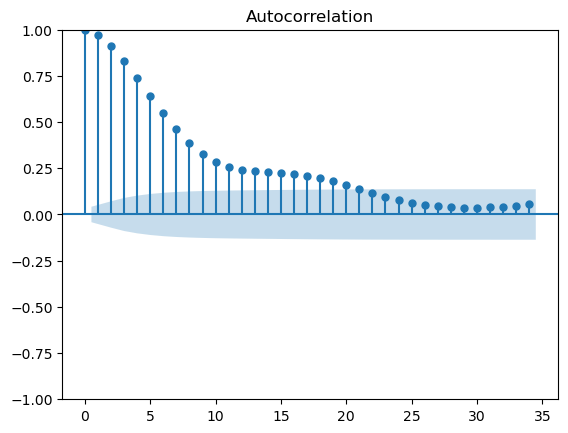

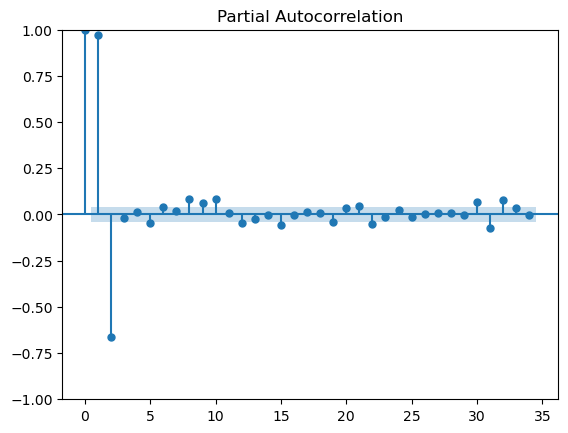

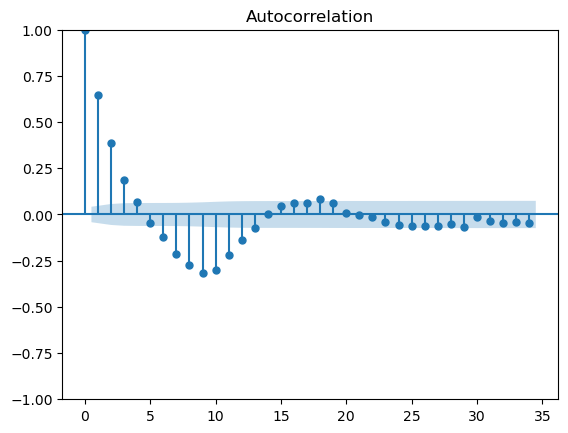

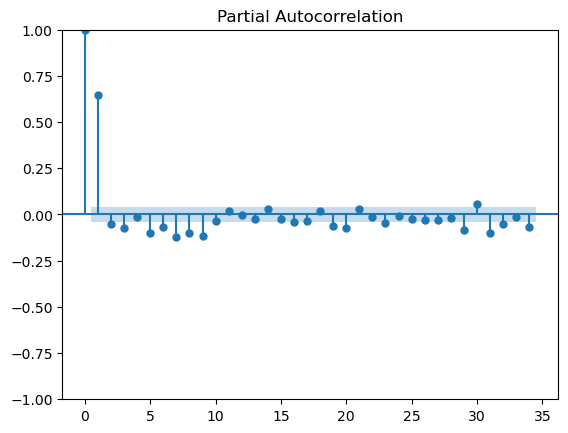

In [7]:
# calculate the ACF and PACF to determine order of ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(parsed_data['Value'].dropna())
plot_pacf(parsed_data['Value'].dropna())
plot_acf(parsed_data['Seasonal Difference'].dropna())
plot_pacf(parsed_data['Seasonal Difference'].dropna())
plot_acf(parsed_data['First Difference'].dropna())
plot_pacf(parsed_data['First Difference'].dropna())

There are no spikes in the ACF plot but there is a single spike in the PACF for both seasonal and non seasonal data plots at lag 2. This suggests that the time series data is an AR(2) process.

Consequently, this initial analysis suggests that a possible model for these data is an ARIMA(2,0,0)(2,0,0)12 model. This model has two AR terms and two seasonal AR terms. The model has no differencing and no moving average terms. The seasonal period is 12.

In [8]:
# choose best model and fit it (as well as some nearby  variations)
from statsmodels.tsa.arima.model import ARIMA

# split data into training (50:50) and testing
split = 0.2
train = parsed_data['Value'].iloc[:int(len(parsed_data)*split)]
test = parsed_data['Value'].iloc[int(len(parsed_data)*split):]

model = ARIMA(train.dropna(), order=(2,0,0), seasonal_order=(2,0,0,365))
model_fit = model.fit()
print(model_fit.summary())


/Users/philblecher/opt/miniconda3/envs/IntrotoAI/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# choose best model with lowest AIC

In [ ]:
# get residuals and plot them to see if they are white noise etc

In [ ]:
# evaluate model with test data

In [ ]:
# forecast future data for next 12 months

In [ ]:
# save this data to a file